# 4.7 - Keşifsel Veri Analizi: Özellik Mühendisliği 1
Bu ödevde de Öğrencilerin Sınav Performansı'na ait verileri kullanacaksınız.<br>

1) Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?<br>

2) Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.<br>

3) Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?<br>

## Cevap 1:
1) Sınav sonuçları normal dağılımlı mıdır? Değilse normal dağılıma sahip hale getirmek için ne yapabiliriz?

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings("ignore")
import seaborn as sns; sns.set(style="whitegrid")

pd.options.display.float_format = "{:.2f}".format

students = pd.read_csv("StudentsPerformance.csv")
students.columns = ["Cinsiyet", "Köken", "Aile Eğitim Seviyesi", "Öğle Yemeği",
                    "Hazırlık Kursu", "Matematik Notu", "Okuma Notu", "Yazma Notu"]
students.head()

,Cinsiyet,Köken,Aile Eğitim Seviyesi,Öğle Yemeği,Hazırlık Kursu,Matematik Notu,Okuma Notu,Yazma Notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


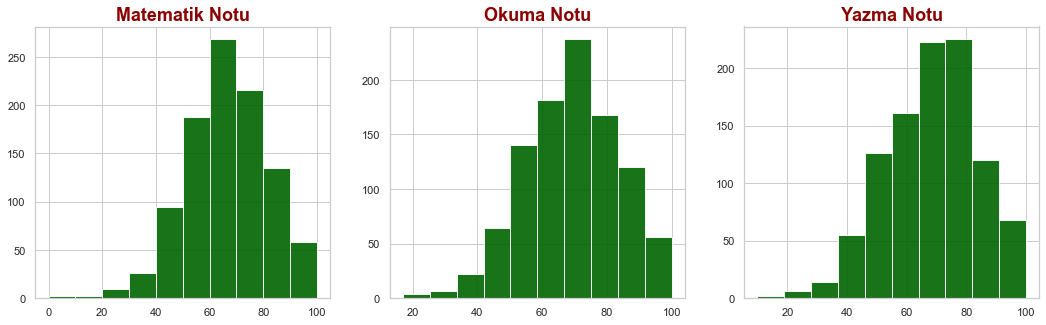

In [171]:
plt.figure(figsize = (18,5))

title_font = {"family":"sans", "color":"darkred", "weight":"bold", "size":18}
axis_font = {"family":"arial", "color":"darkblue", "weight":"normal", "size":14}

# orijinal değişkenler
x=1
for i in students.columns[-3:]:
    plt.subplot(1,3,x)
    plt.hist(students[i], color="darkgreen", alpha=0.9)
    plt.title(f"{i}", fontdict=title_font)
    x+=1
plt.show()
del x

Yukarıdaki grafiklerden, notların normal dağılıma yakın olduğu anlaşılıyor. Bunu Jarque-Bera ve Normal testlerini kullanarak doğrulayalım.

In [172]:
from scipy.stats import jarque_bera    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html
from scipy.stats import normaltest    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

pd.options.display.float_format = "{:.5f}".format

notlar = ["Matematik Notu", "Okuma Notu", "Yazma Notu"]
d_testleri = pd.DataFrame(columns=["Not", "Jarque-Bera Stats", "Jarque-Bera p-value",
                                   "Normal Stats", "Normal p-value"])    # dağılım (distribution) testleri
for grade in notlar:
    j_q = jarque_bera(students[grade])
    norm = normaltest(students[grade])
    d_testleri = d_testleri.append({"Not":grade,
                                    "Jarque-Bera Stats":j_q[0], "Jarque-Bera p-value":j_q[1],
                                    "Normal Stats":norm[0], "Normal p-value":norm[1]}, ignore_index=True)
d_testleri

,Not,Jarque-Bera Stats,Jarque-Bera p-value,Normal Stats,Normal p-value
0,Matematik Notu,15.91226,0.00035,15.40896,0.00045
1,Okuma Notu,11.38330,0.00337,11.11741,0.00385
2,Yazma Notu,13.98509,0.00092,13.60645,0.00111


<b>P-değerleri, 0.05 değerinden oldukça düşük olduğu için, dağılımlar hala tam olarak normal dağılım göstermemektedir fakat yine de normale yakındır diyebiliriz. Dolayısıyla "Notlar normal dağılıma sahiptir." hipotezini reddetmemiz gerekiyor.</b>

<i>/## (bu cümle, doğru bir kullanım oldu mu? null hipotezi kavramını doğru anlamaya çalışıyorum.)</i>

In [173]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
from sklearn.preprocessing import normalize

students["Matematik Notu (Normalize)"] = normalize(np.array(students["Matematik Notu"]).reshape(1, -1)).reshape(-1, 1)
students["Okuma Notu (Normalize)"] = normalize(np.array(students["Okuma Notu"]).reshape(1, -1)).reshape(-1, 1)
students["Yazma Notu (Normalize)"] = normalize(np.array(students["Yazma Notu"]).reshape(1, -1)).reshape(-1, 1)

normal_notlar = ["Matematik Notu", "Matematik Notu (Normalize)", 
                    "Okuma Notu", "Okuma Notu (Normalize)", 
                    "Yazma Notu", "Yazma Notu (Normalize)"]
students.head()

,Cinsiyet,Köken,Aile Eğitim Seviyesi,Öğle Yemeği,Hazırlık Kursu,Matematik Notu,Okuma Notu,Yazma Notu,Matematik Notu (Normalize),Okuma Notu (Normalize),Yazma Notu (Normalize)
0,female,group B,bachelor's degree,standard,none,72,72,74,0.03358,0.03221,0.03356
1,female,group C,some college,standard,completed,69,90,88,0.03218,0.04026,0.03991
2,female,group B,master's degree,standard,none,90,95,93,0.04197,0.04250,0.04218
3,male,group A,associate's degree,free/reduced,none,47,57,44,0.02192,0.02550,0.01995
4,male,group C,some college,standard,none,76,78,75,0.03545,0.03489,0.03401


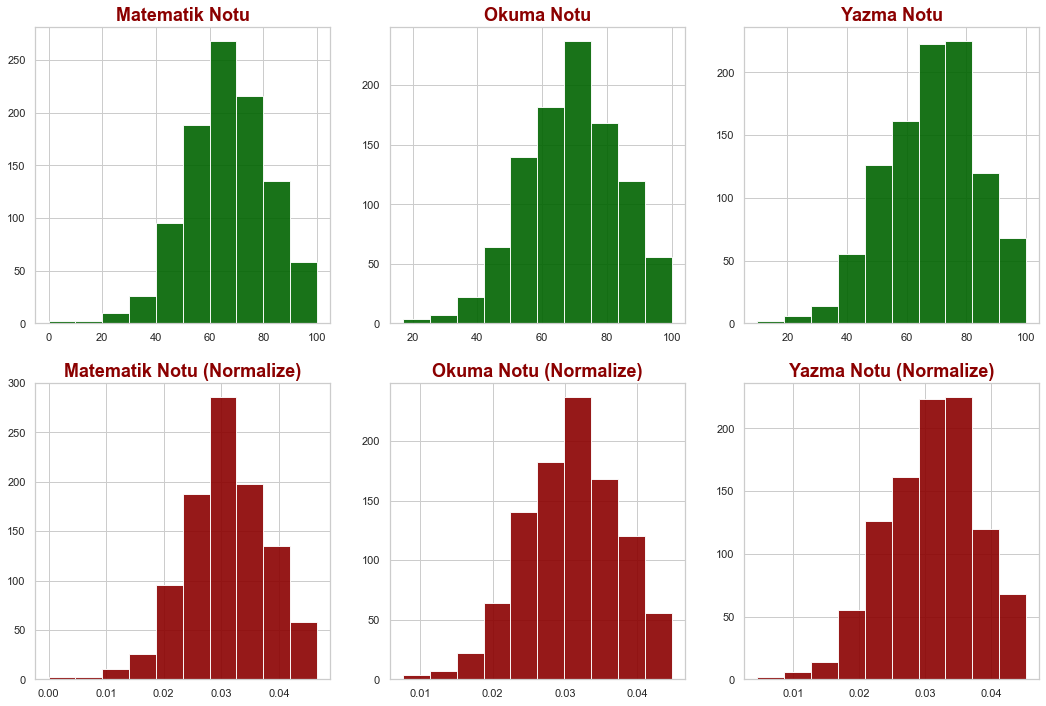

In [174]:
plt.figure(figsize = (18,12))

# orijinal değişkenler
x=1
for i in students.columns[5:8]:
    plt.subplot(2,3,x)
    plt.hist(students[i], color="darkgreen", alpha=0.9)
    plt.title(f"{i}", fontdict=title_font)
    x+=1

# normalize değişkenler
x=4
for i in students.columns[-3:]:
    plt.subplot(2,3,x)
    plt.hist(students[i], color="darkred", alpha=0.9)
    plt.title(f"{i}", fontdict=title_font)
    x+=1
plt.show()
del x

In [175]:
from scipy.stats import jarque_bera    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.jarque_bera.html
from scipy.stats import normaltest    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

pd.options.display.float_format = "{:.5f}".format

d_testleri = pd.DataFrame(columns=["Not", "Jarque-Bera Stats", "Jarque-Bera p-value",
                                   "Normal Stats", "Normal p-value"])    # dağılım (distribution) testleri
for grade in normal_notlar:
    j_q = jarque_bera(students[grade])
    norm = normaltest(students[grade])
    d_testleri = d_testleri.append({"Not":grade,
                                    "Jarque-Bera Stats":j_q[0], "Jarque-Bera p-value":j_q[1],
                                    "Normal Stats":norm[0], "Normal p-value":norm[1]}, ignore_index=True)
d_testleri

,Not,Jarque-Bera Stats,Jarque-Bera p-value,Normal Stats,Normal p-value
0,Matematik Notu,15.91226,0.00035,15.40896,0.00045
1,Matematik Notu (Normalize),15.91226,0.00035,15.40896,0.00045
2,Okuma Notu,11.38330,0.00337,11.11741,0.00385
3,Okuma Notu (Normalize),11.38330,0.00337,11.11741,0.00385
4,Yazma Notu,13.98509,0.00092,13.60645,0.00111
5,Yazma Notu (Normalize),13.98509,0.00092,13.60645,0.00111


/## test sonuçları neden tam olarak aynı çıktı? Normalize ederken hiçbir şey değişmedi mi?

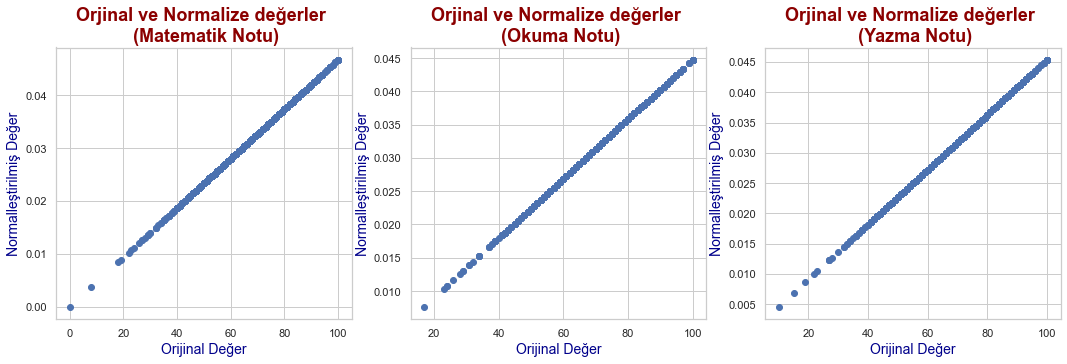

In [176]:
plt.figure(figsize=(18,5))

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.scatter(students[normal_notlar[2*i]], students[normal_notlar[2*i+1]])
    plt.title("Orjinal ve Normalize değerler \n ({})".format(normal_notlar[2*i]), fontdict=title_font)
    plt.xlabel("Orijinal Değer", fontdict=axis_font)
    plt.ylabel("Normalleştirilmiş Değer", fontdict=axis_font)

plt.show()

---
## Cevap 2:
2) Üç sınav sonucunu tek bir değişkende, hedef değişkeni olarak tutmak istiyoruz. Bunun için üç sınavın ortalamasını içeren yeni bir değişken tanımlayın. Bu yeni değişkenin ortalamasının normal dağılımlı olup olmadığını test edin. Eğer normal dağılıma sahip değilse dönüşüm yaparak normal dağılımlı hale getirmeye çalışın ve dönüşümün sonucunu test edin.

In [177]:
students = students.drop(["Matematik Notu (Normalize)", "Okuma Notu (Normalize)", "Yazma Notu (Normalize)"], axis=1)
del d_testleri

In [178]:
pd.options.display.float_format = "{:.2f}".format

students["Not Ortalaması"] = pd.Series()
## sadece bu değişkeni "{:.2f}" yapmayı başaramadım.
# students["Not Ortalaması"] = students["Not Ortalaması"].map('{:.2f}'.format) denedim fakat olmadı.

for i in range(len(students)):
    students["Not Ortalaması"][i] = (students["Matematik Notu"][i]+students["Okuma Notu"][i]+students["Yazma Notu"][i])/3
    
students.tail()

,Cinsiyet,Köken,Aile Eğitim Seviyesi,Öğle Yemeği,Hazırlık Kursu,Matematik Notu,Okuma Notu,Yazma Notu,Not Ortalaması
995,female,group E,master's degree,standard,completed,88,99,95,94.00
996,male,group C,high school,free/reduced,none,62,55,55,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,65.00
998,female,group D,some college,standard,completed,68,78,77,74.33
999,female,group D,some college,free/reduced,none,77,86,86,83.00


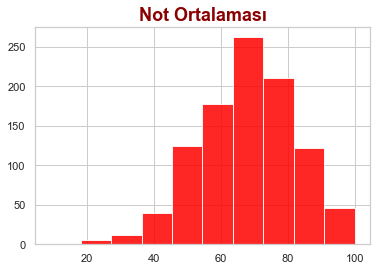

,Değişken,Jarque-Bera Stats,Jarque-Bera p-value,Normal Stats,Normal p-value
0,Not Ortalaması,15.45339,0.00044,15.18672,0.00050


In [179]:
plt.hist(students["Not Ortalaması"], color="red", alpha=0.85)
plt.title("Not Ortalaması", fontdict=title_font)
plt.show()

pd.options.display.float_format = "{:.5f}".format

def d_tests(var):    # dağılım (distribution) testleri
    d_testleri = pd.DataFrame(columns=["Değişken", "Jarque-Bera Stats", "Jarque-Bera p-value",
                                       "Normal Stats", "Normal p-value"])
    j_q = jarque_bera(students[var])
    norm = normaltest(students[var])
    d_testleri = d_testleri.append({"Değişken":var,
                                        "Jarque-Bera Stats":j_q[0], "Jarque-Bera p-value":j_q[1],
                                        "Normal Stats":norm[0], "Normal p-value":norm[1]}, ignore_index=True)
    return d_testleri
d_testleri = d_tests("Not Ortalaması")
display(d_testleri)

Yukarıdaki istatistiklerden, **Not Ortalaması** değişkeninin de tam olarak normal dağılım sergilemediğini görüyoruz. Winsorize ederek tekrardan şansımızı deneyelim.

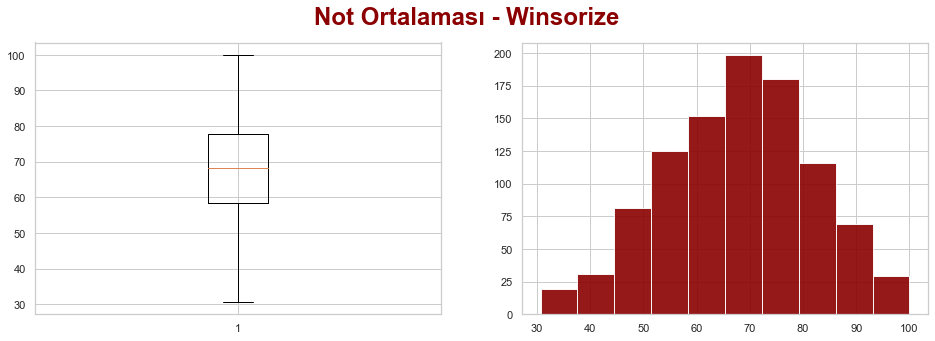

In [180]:
from scipy.stats.mstats import winsorize    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

students["Not Ortalaması W"] = winsorize(students["Not Ortalaması"], (0.01, 0))

plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.boxplot(students["Not Ortalaması W"], whis=None, vert=True)
plt.suptitle("Not Ortalaması - Winsorize", color="darkred", weight="bold", size=24)

plt.subplot(1,2,2)
plt.hist(students["Not Ortalaması W"], color="darkred", alpha=0.9)

plt.show()

In [181]:
d_testleri = d_testleri.append(d_tests("Not Ortalaması W"), ignore_index=True)
d_testleri

,Değişken,Jarque-Bera Stats,Jarque-Bera p-value,Normal Stats,Normal p-value
0,Not Ortalaması,15.45339,0.00044,15.18672,0.00050
1,Not Ortalaması W,9.01693,0.01102,9.46256,0.00882


<b>Winsorize edilmiş dağılım her ne kadar normal dağılıma yaklaşmış olsa da yine de istediğimiz seviyede değildir.</b>

---
## Cevap 3:
3) Bir önceki soruda oluşturduğumuz hedef değişkeni ile hangi değişkenler ilişkili görünüyor? Eğer amacımız sınav başarısını belirleyen etkenleri açıklamak olsaydı hangi değişkenleri veri kümemizde tutmamız gerekirdi?

In [182]:
students = students.drop("Not Ortalaması W", axis=1)

In [183]:
pd.options.display.float_format = "{:.2f}".format

In [184]:
students[0:1000:200]

,Cinsiyet,Köken,Aile Eğitim Seviyesi,Öğle Yemeği,Hazırlık Kursu,Matematik Notu,Okuma Notu,Yazma Notu,Not Ortalaması
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
200,female,group C,associate's degree,standard,completed,67,84,86,79.00
400,female,group C,some high school,standard,completed,59,54,67,60.00
600,female,group D,master's degree,standard,none,54,60,63,59.00
800,male,group C,some high school,standard,completed,67,73,68,69.33


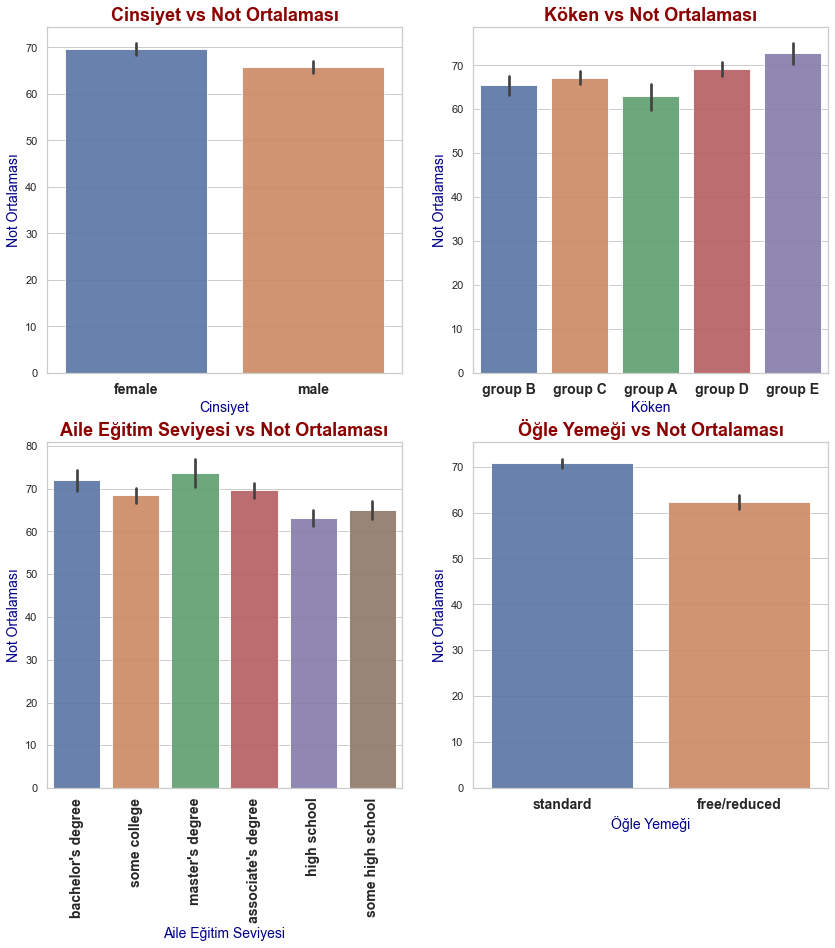

In [186]:
plt.figure(figsize=(14,14))

i=1
for var in students.columns[:4]:
    j = "Not Ortalaması"
    plt.subplot(2,2,i)
    sns.barplot(students[var], students[j], alpha=0.9)
    plt.title(f"{var} vs Not Ortalaması", fontdict=title_font)
    plt.xlabel(f"{var}", fontdict=axis_font)
    plt.ylabel("Not Ortalaması", fontdict=axis_font)
    plt.xticks(weight="bold", fontsize=14)
    i+=1
    if i==4: plt.xticks(rotation=90)

del i
plt.show()

<b>"Cinsiyet", "Köken", "Aile Eğitim Seviyesi", "Öğle Yemeği" ve "Hazırlık Kursu"  değişkenlerimizin _Not Ortalaması_ üzerinde etkisi vardır ve grafiklerden gözlemlenebilmektedir. Dolayısıyla bu değişkenleri veri kümemizde tutmamız faydalı olacaktır. </b><br>Matematik, Okuma ve Yazma notu zaten "Not Ortalaması" değişkenimizi oluşturduğu için, doğrudan orantılıdır.